In [ ]:
from principal_RBM_alpha import *
from utils import *

In [ ]:
dict_az = {
    '0':0, '1':1, '2':2, '3':3, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 
    'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18,
    'J':19, 'K':20, 'L':21, 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27,
    'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35 
}
path_data = "data/binaryalphadigs.mat"
nb_pixels = 20*16
neurons = [200, 100, 50]
epochs = [200, 300, 500]
layers = []
for neuron in neurons :
    for epoch in epochs : 
        rbm_trained = []
        for carac in list(dict_az.keys()):
            data, nb_pixels = lire_alpha_digit([carac], path_data)
            print("Caractère : ", carac)
            rbm = RBM(
            p = nb_pixels, 
            q = neuron)
            rbm.train_RBM(x=data, epochs=200, lr=0.1, show_progress=True)
            rbm_trained.append(rbm)

        # afficher images
        fig, axs = plt.subplots(5, 7, sharex=True, sharey=True)
        fig.suptitle(f'RBM {neuron} neurons, {epoch} epochs')
        for i in range(5):
            for j in range(7):
                rbm = rbm_trained[i*7 + j]
                img = rbm.generer_image_RBM(100, 1)
                axs[i, j].imshow(img[0].cpu(), cmap='Greys')
        plt.show()
        fig.savefig(f"res/RBM-{neuron}neurons-{epoch}epochs.png")

### DBN

In [ ]:
# from principal_RBM_alpha import *
from principal_DBN_alpha_2 import *
from utils import *
from tqdm import notebook

Neurons:   0%|          | 0/3 [00:00<?, ?neuron/s]

Epochs:   0%|          | 0/3 [00:00<?, ?epoch/s]

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

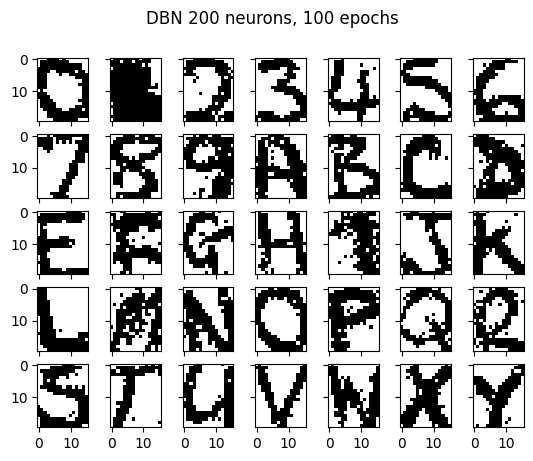

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

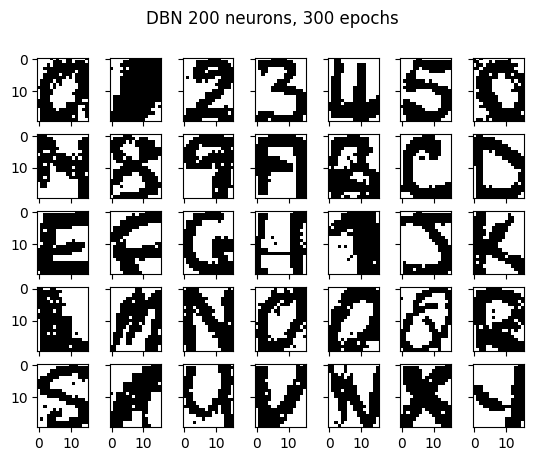

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

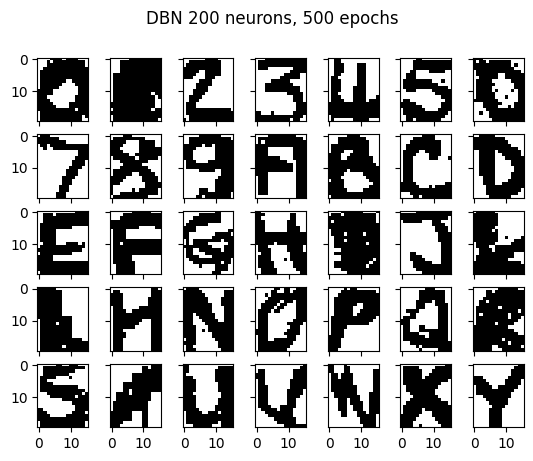

Epochs:   0%|          | 0/3 [00:00<?, ?epoch/s]

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

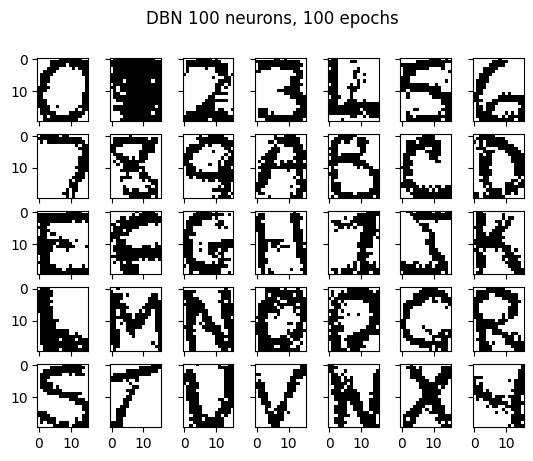

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

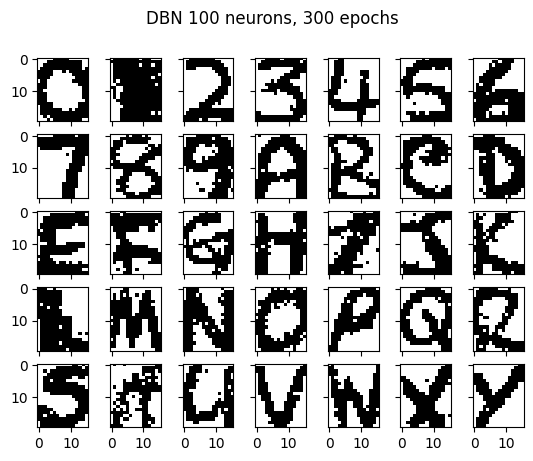

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

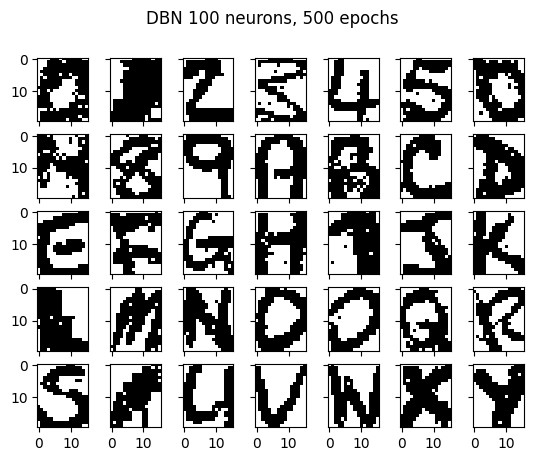

Epochs:   0%|          | 0/3 [00:00<?, ?epoch/s]

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

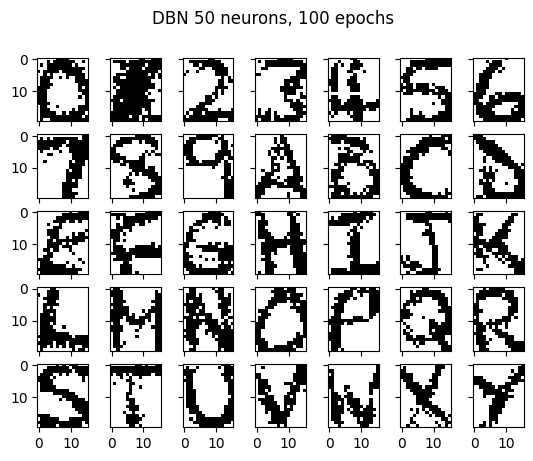

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

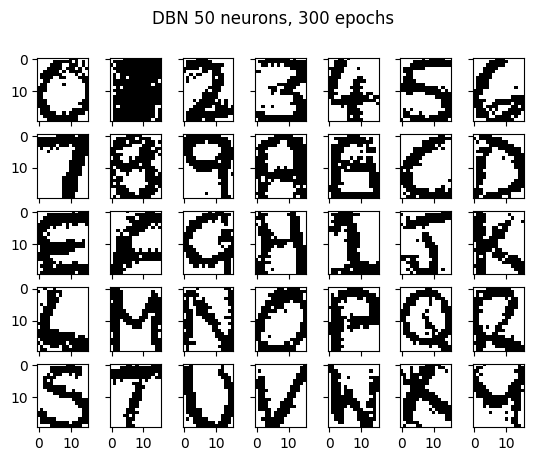

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

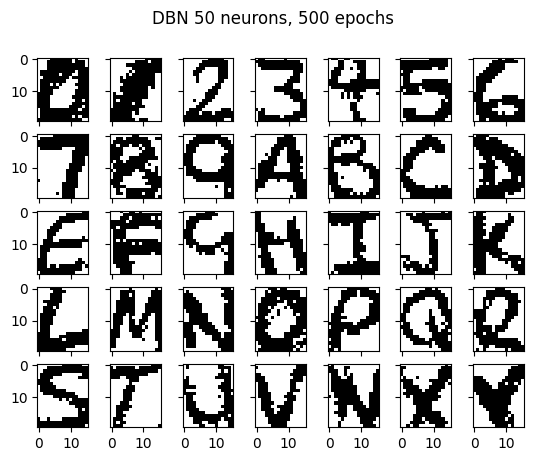

In [15]:
dict_az = {
    '0':0, '1':1, '2':2, '3':3, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 
    'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18,
    'J':19, 'K':20, 'L':21, 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27,
    'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35 
}
path_data = "data/binaryalphadigs.mat"
nb_pixels = 20*16
neurons = [200, 100, 50]
epochs = [100, 300, 500]
for neuron in notebook.tqdm(neurons, desc="Neurons", unit="neuron"):
    for epoch in notebook.tqdm(epochs, desc="Epochs", unit="epoch", leave=False):
        dbn_trained = []
        for carac in notebook.tqdm(list(dict_az.keys()), desc="Characters", unit="char", leave=False):
            data, nb_pixels = lire_alpha_digit([carac], path_data)
            # print("Caractère : ", carac)
            layers = [nb_pixels, neuron, neuron, neuron]

            dbn = DBN(layers=layers)
            dbn.train_DBN(x=data, epochs=[epoch], lr=0.1, plot=False, show_progress=False)
            dbn_trained.append(dbn)

        fig, axs = plt.subplots(5, 7, sharex=True, sharey=True)
        fig.suptitle(f'DBN {neuron} neurons, {epoch} epochs')
        for i in range(5):
            for j in range(7):
                dbn = dbn_trained[i * 7 + j]
                img = dbn.generer_image_DBN(100, 1)
                axs[i, j].imshow(img[0].cpu(), cmap='Greys')
        plt.show()
        fig.savefig(f"res/DBN-{neuron}neurons-{epoch}epochs.png")

## MNIST

In [ ]:
from principal_DNN_MNIST import *

Chargement des données

In [ ]:
# Chargement des données
import torch 
import torchvision.transforms as transforms
import torchvision.datasets as dset
# if not exist, download mnist dataset
train_set = dset.MNIST(root='./data', train=True, transform=None, download=True)
test_set = dset.MNIST(root='./data', train=False, transform=None, download=True)
batch_size = 100
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

train_mnist = (train_set.train_data > 127).float().to(device)
test_mnist = (test_set.train_data > 127).float().to(device)
train_mnist = train_mnist.view(train_mnist.shape[0], -1)
test_mnist = test_mnist.view(test_mnist.shape[0], -1)
nb_classes = len(train_set.class_to_idx)
labels_train_mnist = train_set.train_labels
labels_test_mnist = test_set.test_labels

In [ ]:
x_train = train_mnist.view((train_mnist.shape[0], 1, -1))
# one hot encoding of labels, put 1 on the idx 
y_train = torch.zeros(train_mnist.shape[0], nb_classes)
y_train[torch.arange(train_mnist.shape[0]), labels_train_mnist] = 1
y_train = y_train.view((y_train.shape[0], 1, -1))
y_train.shape
x_train = x_train.double().to(device)
y_train = y_train.double().to(device)
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)

x_test = test_mnist.view((test_mnist.shape[0], 1, -1))
# one hot encoding of labels, put 1 on the idx 
y_test = torch.zeros(test_mnist.shape[0], nb_classes)
y_test[torch.arange(test_mnist.shape[0]), labels_test_mnist] = 1
y_test = y_test.view((y_test.shape[0], 1, -1))
y_test.shape
x_test = x_test.double().to(device)
y_test = y_test.double().to(device)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_traintest = torch.concat([x_train, x_test])
y_traintest = torch.concat([y_train, y_test])
x_traintest.shape, y_traintest.shape

### FIGURE 1

In [ ]:
# FIGURE 1
list_nb_layers = [1, 2, 3, 4] # liste des hidden layers /!\ DNN rajoute une couche de plus qu'indiquer sur Q
nb_neurons = 200
nb_layers = 1
nb_pixels = x_train.shape[2]
res_dnn1 = []
res_dnn2 = []
for layer in list_nb_layers:
    Q = [nb_pixels] + [nb_neurons]*(nb_layers)
    dnn1 = DNN()
    dnn2 = DNN()
    dnn1.init_DNN(
        Q = Q,
        nb_classes=nb_classes
        )
    dnn2.init_DNN(
        Q = Q,
        nb_classes=nb_classes
        )
    dnn1.pretrain_DNN(epochs=[100], lr=0.2, batch_fraction=0.005,
                     x=x_train, plot_error=True)
    dnn1.retropropagation(epochs=200, lr=0.2, batch_fraction=0.005, X=x_train,
                            Y=y_train, plot_error=True)
    dnn2.retropropagation(epochs=200, lr=0.2, batch_fraction=0.005, X=x_train,
                            Y=y_train, plot_error=True)
    res_dnn1.append(dnn1.test_DNN(x_traintest, y_traintest))
    res_dnn2.append(dnn2.test_DNN(x_traintest, y_traintest))

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
res_dnn1_np = np.array([el.numpy() for el in res_dnn1])
res_dnn2_np = np.array([el.numpy() for el in res_dnn2])

sns.lineplot(x=[1, 2, 3, 4], y=res_dnn1_np, label="Pre-train")
sns.lineplot(x=[1, 2, 3, 4], y=res_dnn2_np, label="No pre-train")
plt.xlabel("Number of hidden layer")
plt.ylabel("Classification error rate")
plt.savefig(f"/res/fig1.png")

### FIGURE 2

In [ ]:
# FIGURE 2
list_nb_neurons = [100, 200, 300, 500]
nb_pixels = x_train.shape[2]
res_dnn1_neuron = []
res_dnn2_neuron = []
for neuron in list_nb_neurons:
    Q = [nb_pixels] + [neuron]
    dnn1 = DNN()
    dnn2 = DNN()
    dnn1.init_DNN(
        Q = Q,
        nb_classes=nb_classes
        )
    dnn2.init_DNN(
        Q = Q,
        nb_classes=nb_classes
        )
    dnn1.pretrain_DNN(epochs=[100], lr=0.1, batch_fraction=0.01,
                     x=x_train, plot_error=True)
    dnn1.retropropagation(epochs=200, lr=0.1, batch_fraction=0.01, X=x_train,
                            Y=y_train, plot_error=True)
    dnn2.retropropagation(epochs=200, lr=0.1, batch_fraction=0.01, X=x_train,
                            Y=y_train, plot_error=True)
    res_dnn1_neuron.append(dnn1.test_DNN(x_traintest, y_traintest))
    res_dnn2_neuron.append(dnn2.test_DNN(x_traintest, y_traintest))

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
res_dnn1_np = np.array([el.numpy() for el in res_dnn1_neuron])
res_dnn2_np = np.array([el.numpy() for el in res_dnn2_neuron])
sns.lineplot(x=[100, 200, 300, 500], y=res_dnn1_np, label="Pre-train")
sns.lineplot(x=[100, 200, 300, 500], y=res_dnn2_np, label="No pre-train")
plt.xlabel("Number of neurons per layer")
plt.ylabel("Classification error rate")
plt.savefig(f"/res/fig2.png")

### FIGURE 3

In [ ]:
# FIGURE 3
list_trainsize = [1000, 3000, 7000, 10000, 30000, 60000]
nb_pixels = x_train.shape[2]
res_dnn1_trainsize = []
res_dnn2_trainsize = []
for size in list_trainsize:
    Q = [nb_pixels, 200, 200]
    shuffled_indices = np.arange(x_train.shape[0])
    np.random.shuffle(shuffled_indices)
    x_shuffled = x_train[shuffled_indices]
    Y_shuffled = y_train[shuffled_indices]
    x_reduce = x_shuffled[0:size]
    y_reduce = Y_shuffled[0:size]
    dnn1 = DNN()
    dnn2 = DNN()
    dnn1.init_DNN(
        Q = Q,
        nb_classes=nb_classes
        )
    dnn2.init_DNN(
        Q = Q,
        nb_classes=nb_classes
        )
    dnn1.pretrain_DNN(epochs=[100], lr=0.1, batch_fraction=0.01,
                     x=x_reduce, plot_error=True)
    dnn1.retropropagation(epochs=200, lr=0.1, batch_fraction=0.01, X=x_reduce,
                            Y=y_reduce, plot_error=True)
    dnn2.retropropagation(epochs=200, lr=0.1, batch_fraction=0.01, X=x_reduce,
                            Y=y_reduce, plot_error=True)
    res_dnn1_trainsize.append(dnn1.test_DNN(x_traintest, y_traintest))
    res_dnn2_trainsize.append(dnn2.test_DNN(x_traintest, y_traintest))

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
res_dnn1_np = np.array([el.numpy() for el in res_dnn1_trainsize])
res_dnn2_np = np.array([el.numpy() for el in res_dnn2_trainsize])
sns.lineplot(x=[1000, 3000, 7000, 10000, 30000, 60000], y=res_dnn1_np, label="Pre-train")
sns.lineplot(x=[1000, 3000, 7000, 10000, 30000, 60000], y=res_dnn2_np, label="No pre-train")
plt.xlabel("Training size")
plt.ylabel("Classification error rate")
plt.yscale('log')
plt.savefig(f"/res/fig3.png")

## Tuning hyperparameters

In [ ]:
# Tuning of hyperparameters
lr = [0.1, 0.15, 0.2]
hidden_layers = [1, 2, 3]
train_size = [60000] #30000, 
batch_size = [0.005] #0.01, 
neurons = [500] # 300, 400, 
epochs_pretrain = [300]
epoch_backprop = [500]
import itertools
a = [lr, hidden_layers, train_size, batch_size, neurons,
         epochs_pretrain, epoch_backprop]
grid_search = list(itertools.product(*a))

In [ ]:
import time 
t1 = time.time()
nb_pixels = x_train.shape[2]
res_comb = {}
for comb in grid_search :
    print(comb)
    lr, hidden_layers, size, batch_size, nb_neurons,epochs_pretrain, epoch_backprop = comb
    Q = [nb_pixels] + [nb_neurons]*(hidden_layers)
    shuffled_indices = np.arange(x_train.shape[0])
    np.random.shuffle(shuffled_indices)
    x_shuffled = x_train[shuffled_indices]
    Y_shuffled = y_train[shuffled_indices]
    x_reduce = x_shuffled[0:size]
    y_reduce = Y_shuffled[0:size]
    dnn1 = DNN()
    dnn1.init_DNN(
        Q = Q,
        nb_classes=nb_classes
        )
    dnn1.pretrain_DNN(epochs=[epochs_pretrain], lr=lr, batch_fraction=batch_size,
                     x=x_reduce, plot_error=True)
    dnn1.retropropagation(epochs=epoch_backprop, lr=lr, batch_fraction=batch_size,
                          X=x_reduce,
                            Y=y_reduce, plot_error=True)
    res_comb[comb] = dnn1.test_DNN(x_traintest, y_traintest).numpy()
    t2 = time.time()
    print(res_comb[comb])
    print('Execution time 1 comb:', t2-t1, 'seconds')

t3 = time.time()
elapsed_time = t3 - t1
print('Execution time:', elapsed_time, 'seconds')
    